In [1]:
using CSV, DataFrames, Dates

# Read the CSV file
file_path = "data/test.csv"  # Replace with your file path
df = CSV.read(file_path, DataFrame, header=3)  # Skip the first 2 header rows
rename!(df, [:timestamp => :datetime, :open => :open, :high => :high, :low => :low, :close => :close, :volume => :volume])
df.datetime = DateTime.(df.datetime, "mm/dd/yyyy HH:MM:SS")
df.date = Date.(df.datetime)  # Add a date column
grouped_by_day = groupby(df, :date)  # Group by the date column


Row,datetime,open,high,low,close,volume,date
,DateTime,Float64?,Float64?,Float64?,Float64?,Int64?,Date
1,0017-09-11T09:30:00,160.5,160.62,160.5,160.57,407091,0017-09-11
2,0017-09-11T09:31:00,160.58,160.76,160.51,160.51,266236,0017-09-11
3,0017-09-11T09:32:00,160.525,160.53,160.23,160.32,209863,0017-09-11
4,0017-09-11T09:33:00,160.32,160.36,160.03,160.15,205695,0017-09-11
5,0017-09-11T09:34:00,160.15,160.3,160.1,160.28,140139,0017-09-11
6,0017-09-11T09:35:00,160.267,160.28,159.9,160.02,218070,0017-09-11
7,0017-09-11T09:36:00,160.03,160.3,159.89,160.285,149953,0017-09-11
8,0017-09-11T09:37:00,160.29,160.487,160.23,160.48,170088,0017-09-11
9,0017-09-11T09:38:00,160.49,160.63,160.48,160.52,190686,0017-09-11


In [10]:
using DataFrames, Dates

# Assuming `df` contains the original data with a datetime column
df.date = Date.(df.datetime)  # Extract the date
df.time_of_day = Time.(df.datetime)  # Extract the time of day

# Pivot the data
pivoted_prices = unstack(df, :time_of_day, :date, :close)

# View the result
println(pivoted_prices)
csv_path = "data/pivoted_prices.csv"  # Replace with your desired file path
CSV.write(csv_path, pivoted_prices)  # Write the pivoted data to a CSV file

391×114 DataFrame
 Row │ time_of_day  0017-09-11  0017-09-12  0017-09-13  0017-09-14  0017-09-15  0017-09-18  0017-09-19  0017-09-20  0017-09-21  0017-09-22  0017-09-25  0017-09-26  0017-09-27  0017-09-28  0017-09-29  0017-10-02  0017-10-03  0017-10-04  0017-10-05  0017-10-06  0017-10-09  0017-10-10  0017-10-11  0017-10-12  0017-10-13  0017-10-16  0017-10-17  0017-10-18  0017-10-19  0017-10-20  0017-10-23  0017-10-24  0017-10-25  0017-10-26  0017-10-27  0017-10-30  0017-10-31  0017-11-01  0017-11-02  0017-11-03  0017-11-06  0017-11-07  0017-11-08  0017-11-09  0017-11-10  0017-11-13  0017-11-14  0017-11-15  0017-11-16  0017-11-17  0017-11-20  0017-11-21  0017-11-22  0017-11-23  0017-11-24   0017-11-27  0017-11-28  0017-11-29  0017-11-30  0017-12-01  0017-12-04  0017-12-05  0017-12-06  0017-12-07   0017-12-08  0017-12-11  0017-12-12  0017-12-13  0017-12-14  0017-12-15  0017-12-18  0017-12-19  0017-12-20  0017-12-21  0017-12-22  0017-12-26  0017-12-27  0017-12-28  0017-12-29  0018-01-02  

Excessive output truncated after 524288 bytes.

"data/pivoted_prices.csv"

In [11]:
# Calculate the differences between successive rows, excluding the time_of_day column
differences = diff(Matrix(pivoted_prices[:, 2:end]), dims=2)

# Convert the differences back to a DataFrame
differences_df = DataFrame(differences, :auto)

# Add the time_of_day column back to the differences DataFrame
#differences_df.time_of_day = pivoted_prices.time_of_day[2:end]

# View the result
println(differences_df)

In [20]:
m_returns=diff(log.(Matrix(pivoted_prices[:, 2:end])),dims=1)#./log.(Matrix(pivoted_prices[1:end-1, 2:end])))
df_returns=DataFrame(m_returns, names(pivoted_prices)[2:end])
df_returns.time_of_day = pivoted_prices.time_of_day[2:end]
select(df_returns,:time_of_day, Not(:time_of_day))
count(ismissing,df_returns.time_of_day)
missing_counts = count.(ismissing, eachcol(df_returns))
println(missing_counts)
num_missing=[count(ismissing,df_column) for df_column in eachcol(df_returns)]
names(df_returns)
df_missing=DataFrame(:date => names(df_returns),:num_missing => num_missing)
sort(df_missing, :num_missing, rev=true)
m_returns=m_returns*sqrt(252) *sqrt(6.5)*sqrt(60)*10
#df_missing=DataFrame(num_missing, names(df_returns))
#df_returns.dates=pivoted_prices.date[2:end]


390×113 Matrix{Union{Missing, Float64}}:
 -1.17166   -8.10119    -8.22039   …   0.288489  -5.91224   -4.55333
 -3.71314   -4.83209    -4.13207       5.47626    1.29426    2.73279
 -3.32601    2.32033    -5.12346       0.671864   4.2488     2.00253
  2.54178   -3.28571    -0.986241      8.36128   -0.369232   3.81947
 -5.08759    0.917019    1.92683      -1.45903   -9.05979    3.63327
  5.18734    0.0483586   6.83983   …   8.03347   -2.40802    2.90358
  3.81163    0.193427   -4.82355      -3.05794    5.92411   -1.26999
  0.781299  -6.00179     5.70871       0.573591   2.21866   -1.81516
  4.44774   -0.581428    3.34166      -1.33854    3.23273    4.73536
  0.625963   2.71241     2.35471       1.52972    8.9419     5.23685
  ⋮                                ⋱   ⋮                    
  0.670706  -0.975743    0.590074      0.374413   1.68926   -0.725015
 -0.27993    0.390334    1.37641      -0.655253  -1.50959   -2.17605
  1.65006   -0.390334    1.3758        0.655253  -0.998324  -0.272113

In [21]:
# Include the gibbs_sampling.jl file
include("gibbs_sampling.jl")

iterations=1000
K=2
# Apply a function to each column of m_returns

# Filter columns with no missing values
no_missing_indices = findall(col -> all(!ismissing, col), eachcol(m_returns))

# Apply the function only to columns with no missing values
results = [gibbs_sampling(m_returns[:, i], K, iterations) for i in no_missing_indices]
# Get the column names for columns with no missing values
no_missing_colnames = names(df_returns)[no_missing_indices]
R=m_returns[:,2]


# Now you can call the functions defined in gibbs_sampling.jl
# For example, if there is a function named `gibbs_sample` in the file, you can call it like this:
result = gibbs_sampling(R,K,iterations)  # Replace `parameters...` with the actual parameters required by the function
μ, σ², π, z = result  # Assuming the function returns 4 values

# Print or use the result as needed
#println(result)
results

108-element Vector{Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Int64}}}:
 ([-0.17054577491861078, -0.003629445231050624], [5.1372636328886205, 0.5414494292156786], [0.2412332810936956, 0.7587667189063043], [2, 1, 1, 1, 1, 1, 1, 2, 1, 2  …  2, 2, 2, 2, 2, 2, 2, 2, 1, 1])
 ([0.3523377336960832, -0.5763993823693049], [1.304347219895186, 13.36717524983866], [0.4289131074399501, 0.57108689256005], [2, 2, 1, 2, 2, 1, 2, 2, 2, 2  …  1, 2, 1, 1, 1, 2, 2, 1, 1, 2])
 ([-0.1625370024974104, 0.010052058854030951], [8.232779272522087, 0.6952184772886022], [0.3264297417646922, 0.6735702582353078], [1, 1, 1, 1, 2, 1, 1, 1, 1, 1  …  2, 2, 1, 2, 2, 2, 2, 2, 1, 2])
 ([0.006721674467986826, 0.023557710134935978], [0.5710719694842731, 4.897622784507113], [0.837613619134507, 0.16238638086549295], [1, 2, 2, 1, 2, 2, 2, 1, 1, 2  …  2, 1, 1, 1, 1, 1, 1, 1, 1, 1])
 ([0.48529402910511343, 0.010247854950828254], [4.610154088131556, 0.5582914326884608], [0.2948997313096973, 0.7051002686903027]

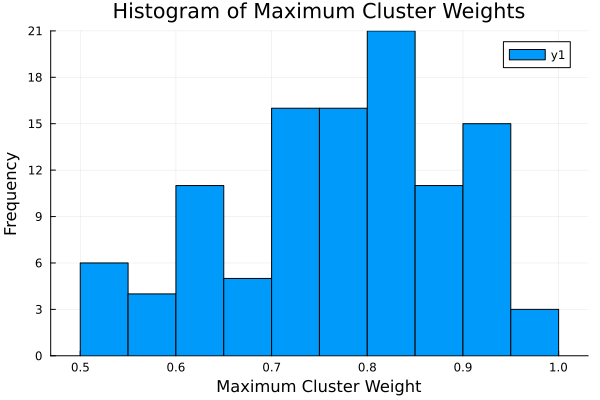

In [22]:
no_missing_colnames

cluster_weights=[r[3] for r in results]
max_cluster_weights = [maximum(weights) for weights in cluster_weights]
max_weight_variances = [r[2][argmax(r[3])] for r in results]
println(max_weight_variances)
#using PyPlot
#hist(max_cluster_weights, bins=20, edgecolor="black")
#xlabel("Maximum Cluster Weight")
#ylabel("Frequency")
#title("Histogram of Maximum Cluster Weights")
#PyPlot.show()
using Plots
histogram(max_cluster_weights, bins=20, xlabel="Maximum Cluster Weight", ylabel="Frequency", title="Histogram of Maximum Cluster Weights")

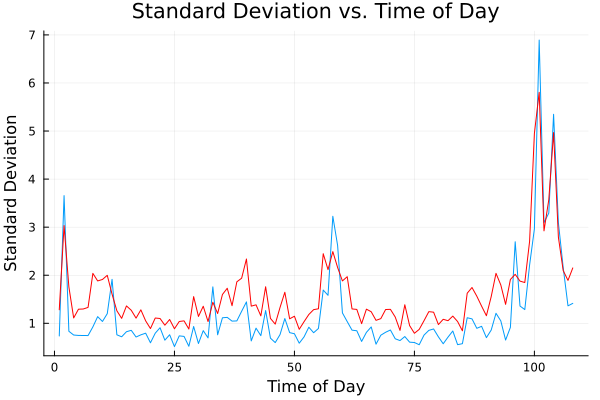

In [23]:
using Plots

# Plot the maximum weight variances
plot(sqrt.(max_weight_variances),  xlabel="Time of Day", ylabel="Standard Deviation", title="Standard Deviation vs. Time of Day", legend=nothing)

#all_stds=[std(non_missing_col) for non_missing_col in eachcol(m_returns)]
all_stds = [sqrt(var(m_returns[:, i])) for i in no_missing_indices]

plot!(all_stds, xlabel="Time of Day", ylabel="Standard Deviation", title="Standard Deviation vs. Time of Day", legend=nothing, color=:red)
# Calculate the minimum weight variances
#min_weight_variances = [r[2][argmin(r[3])] for r in results]

# Overlay the minimum weight variances on the same plot
#plot!(sqrt.(min_weight_variances) * sqrt(252) * sqrt(6.5) * sqrt(60), xlabel="Time of Day", ylabel="Standard Deviation", title="Standard Deviation vs. Time of Day", legend=nothing)

In [ ]:
m_returns[:, 1]
#sqrt.(var(m_returns[:, 1])) * sqrt(252) * sqrt(24) * sqrt(60)
sqrt(var(m_returns[:, 1]))
result=gibbs_sampling(m_returns[:, 1]*sqrt(252) * sqrt(24) * sqrt(60), K, iterations)
sqrt(result[2][argmax(result[3])])

In [80]:
pivoted_prices[:,2]

#m_returns[:,1]
a=diff(log.(pivoted_prices[:,2]))
std(a)*sqrt(252)*sqrt(6.5)*sqrt(60)
#sqrt.(results[1][2])*sqrt(252)*sqrt(6.5)*sqrt(60)
std(m_returns[:,1])*sqrt(252)*sqrt(6.5)*sqrt(60)
results[1][2]

2-element Vector{Float64}:
 0.6012798543776421
 0.010359996085016502

In [94]:
sigmas=[r[2] for r in results]
weights=[r[3] for r in results]
means=[r[1] for r in results]
#sqrt.(sigmas)*sqrt(252)*sqrt(6.5)*sqrt(60)
[sqrt.(sigmas[i])*sqrt(252)*sqrt(6.5)*sqrt(60) for i in 1:2]

2-element Vector{Vector{Float64}}:
 [243.09213086448247, 31.908939425111296]
 [30.65339990755888, 469.2526320447613]

In [13]:
m_returns[:,1]

390-element Vector{Union{Missing, Float64}}:
 -7.358899520222121e-5
 -0.00023323059101585427
 -0.0002089631549582494
  0.00015972578696924709
 -0.0003196532358971569
  0.00032602479779421254
  0.00023948289635447728
  4.907697423589906e-5
  0.0002793692283119579
  3.9306698081547916e-5
  ⋮
  4.209095696384317e-5
 -1.7566565136264914e-5
  0.00010354872819235921
  1.828727072796634e-5
  1.2190346480403659e-5
 -3.657286019478601e-5
  3.0478970389248982e-5
  6.703507341279159e-5
  9.745826606185408e-5

I want to eliminate all of the dates that have missing values.
then for each date do a prediction for the missing values.

In [ ]:
df_no_missing = filter(row -> row.num_missing == 0, df_missing)


Base.Meta.ParseError: ParseError:
# Error @ /Users/stirlitz/ncGitHub/daily_options/daily_options1/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W4sZmlsZQ==.jl:2:17
df_no_missing = filter(row -> row.num_missing == 0, df_missing)
df_no_missing = = filter(row filter(row - ->> row.date row.date !== "time_of_day", "time_of_day", df_no_missing) df_no_missing)
#               ╙ ── unexpected `=`